Mean squared error: 28242.631390857074
Root mean squared error: 168.0554414199584
Mean absolute error: 89.92853248906611
R2 score: 0.9246016142122424

Cross-Validation Scores: [ 0.69284509  0.94571136  0.87054878  0.97282574  0.67544353  0.94621293
  0.9813081   0.96514922  0.371955   -0.07802877]

Average Cross-Validation Score: 0.734397097009008


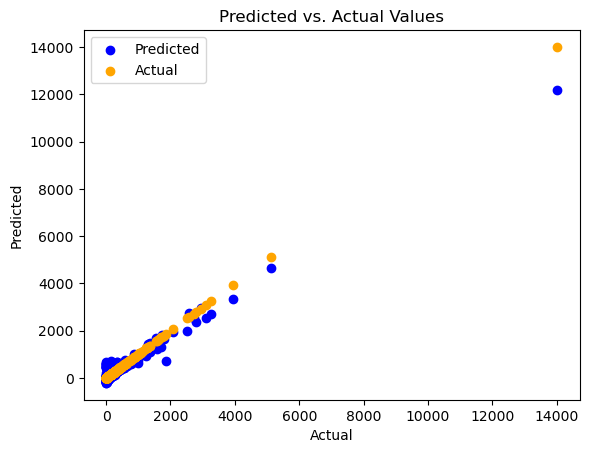

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load data from CSV file
data = pd.read_csv("cancer_reg_updated.csv")

# Fill missing values with the mean of the respective column
data = data.fillna(data.mean())

# Separate features and target variable
X = data.drop(['avgDeathsPerYear'], axis=1)
y = data['avgDeathsPerYear']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Lasso model with alpha=0.1
lasso = Lasso(alpha=0.1)

k = 10
cv_scores = cross_val_score(lasso, X, y, cv=k)

# Fit the Lasso model to the training data
lasso.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = lasso.predict(X_test)

# Print the mean squared error, root mean squared error, mean absolute error, and R2 score of the Lasso model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())

# Scatterplot for the predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
